In [101]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd
from jupyter_dash import JupyterDash
import matplotlib.pyplot as plt

In [102]:
df = pd.read_csv(r"D:\2.WORK_DAILY\4.eKGIS_Data Science\Water\data\iot_huewaco_pmac.csv")

In [103]:
df.shape

(18494316, 13)

In [104]:
list = df.columns.tolist()
for i in list:
    print(i, df[i].nunique())

projectid 1
deviceid 203
regionid 1
parameterid 20
device_key 203
parameter_key 20
ts 262379
bool_v 0
str_v 0
long_v 0
dbl_v 8206
json_v 0
extra 0


In [105]:
df = df[['deviceid','parameterid','device_key','parameter_key','ts','dbl_v']]


In [106]:
df['time'] = pd.to_datetime(df['ts'], unit='s')
df = df.drop(columns='ts')
df.head()


,deviceid,parameterid,device_key,parameter_key,dbl_v,time
0,66f113dbbfa5a22a633dc0ec,66f117433ae6a76b973653fb,2,Pressure,-5.5,2024-09-03 01:15:00
1,66f113dbbfa5a22a633dc0ec,66f117433ae6a76b973653fb,2,Pressure,-5.5,2024-09-03 01:30:00
2,66f113dbbfa5a22a633dc0ec,66f117433ae6a76b973653fb,2,Pressure,-5.5,2024-09-03 01:45:00
3,66f113dbbfa5a22a633dc0ec,66f117433ae6a76b973653fb,2,Pressure,-5.5,2024-09-03 02:00:00
4,66f113dbbfa5a22a633dc0ec,66f117433ae6a76b973653fb,2,Pressure,10.0,2024-09-03 02:15:00


In [107]:
print(df['parameter_key'].unique())

['Pressure' 'Flow 1' 'Flow 2' 'Pressure 2' 'Pressure 1' 'Ambient temp.'
 'Int batt' 'Water temp' 'Flow 1 (Count)' 'Flow 2 (Count)' 'HLC V'
 'Ext Supply' 'Door status' 'Chlorine' 'Foward Flow' 'Reverse Flow'
 'Water temp 1' 'Internal temp.' 'Channel 4' 'Turbidity']


In [108]:
mapping = {
    'Pressure': 'Áp lực',
 'Flow 1': 'Lưu lượng thuận',
 'Flow 2':'Lưu lượng nghịch',
 'Pressure 2':'Áp lực',
 'Pressure 1': 'Áp lực',
 'Ambient temp.':'Nhiệt độ bên ngoài',
 'Water temp':'Nhiệt độ nước',
 'Flow 1 (Count)': 'Lưu lượng thuận (đếm)',
 'Flow 2 (Count)': 'Lưu lượng nghịch (đếm)',
 'Water temp 1':'Nhiệt độ nước',
 'Internal temp.':'Nhiệt độ bên trong',
 'Turbidity':'Độ đục'
}

In [109]:
df['parameter_key'].replace(mapping, inplace =True)

### **Phân tích**

In [110]:
# Đếm số lần xuất hiện của mỗi deviceid và lấy ra deviceid có nhiều record nhất để phân tích
deviceid_counts = df['deviceid'].value_counts()
most_common_deviceid = deviceid_counts.idxmax()
most_common_deviceid_count = deviceid_counts.max()
print(f"DeviceID có nhiều record nhất: {most_common_deviceid}, với số lần xuất hiện: {most_common_deviceid_count}")


DeviceID có nhiều record nhất: 66f113dabfa5a22a633dc0da, với số lần xuất hiện: 563502


In [120]:
deviceid_counts

deviceid
66f113dabfa5a22a633dc0da    563502
66f113dabfa5a22a633dc0d8    562232
66f113dabfa5a22a633dc0d7    546011
66f113dabfa5a22a633dc0d4    460887
66f113dbbfa5a22a633dc0f2    422604
                             ...  
66f113dcbfa5a22a633dc207      2304
66f113dcbfa5a22a633dc1cc      2304
66f113dcbfa5a22a633dc1e3      2304
66f113dbbfa5a22a633dc14e       988
66f113dbbfa5a22a633dc139       835
Name: count, Length: 203, dtype: int64

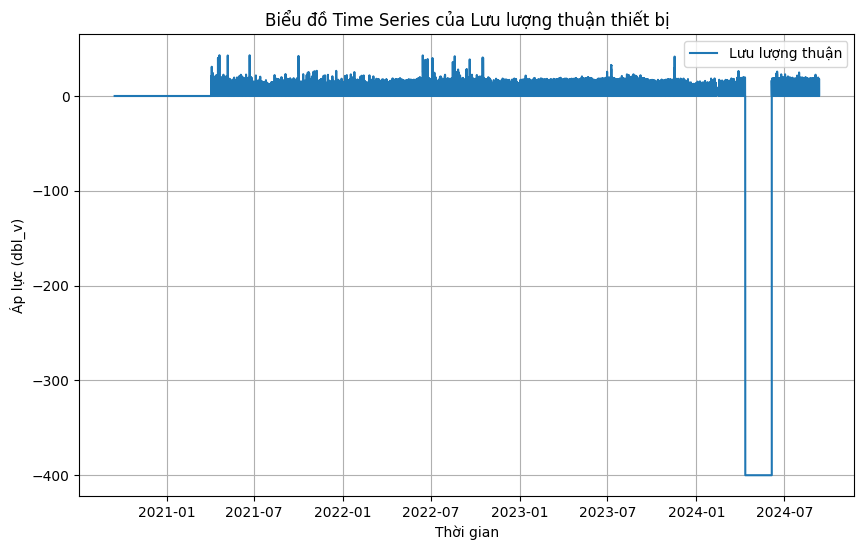

In [153]:
df_pre = df[df['parameter_key']=='Lưu lượng thuận']
start_date = '2017-09-01'
end_date = '2024-09-20'
df_deviceid = df_pre[(df_pre['deviceid'] == '66f113dabfa5a22a633dc0d4') & 
                     (df_pre['time'] >= start_date) & 
                     (df_pre['time'] <= end_date)]

df_deviceid = df_deviceid.sort_values(by='time')
plt.figure(figsize=(10, 6))
plt.plot(df_deviceid['time'], df_deviceid['dbl_v'], label='Lưu lượng thuận')
plt.xlabel('Thời gian')
plt.ylabel('Áp lực (dbl_v)')
plt.title('Biểu đồ Time Series của Lưu lượng thuận thiết bị')
plt.legend()
plt.grid(True)
plt.show()

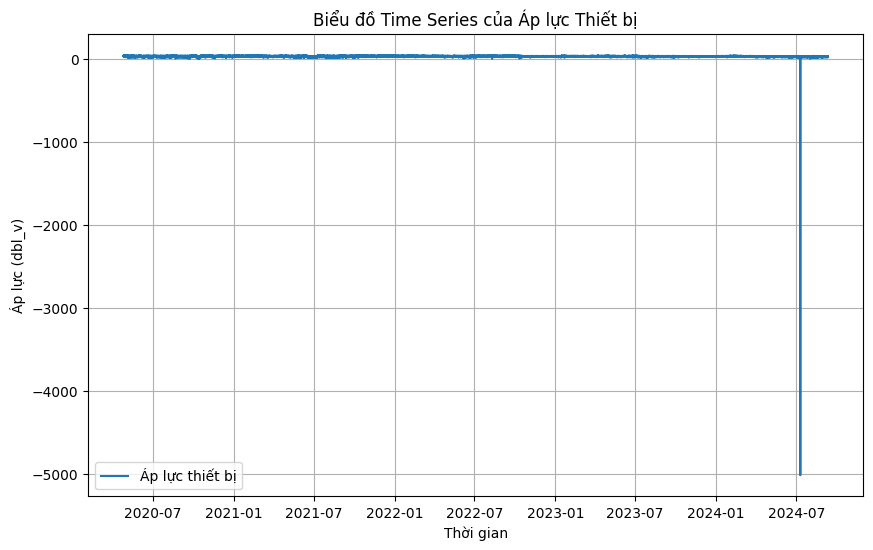

In [154]:
df_pre = df[df['parameter_key']=='Áp lực']
start_date = '2017-09-01'
end_date = '2024-09-20'
df_deviceid = df_pre[(df_pre['deviceid'] == '66f113dabfa5a22a633dc0d4') & 
                     (df_pre['time'] >= start_date) & 
                     (df_pre['time'] <= end_date)]

df_deviceid = df_deviceid.sort_values(by='time')
plt.figure(figsize=(10, 6))
plt.plot(df_deviceid['time'], df_deviceid['dbl_v'], label='Áp lực thiết bị')
plt.xlabel('Thời gian')
plt.ylabel('Áp lực (dbl_v)')
plt.title('Biểu đồ Time Series của Áp lực Thiết bị')
plt.legend()
plt.grid(True)
plt.show()

 Thực hiện phân tích dữ liệu đối với một số thiết bị có nhiều record nhất để nhìn thấy xu hướng trong khoảng thời gian dài thì thấy các thiết bị này các biểu đồ times series của nó cũng hơi khó hiểu:
- Các giá trị của nó lên xuống đều không rõ ràng, đột ngột và ổn định cái đột ngột đó thời gian dài. Các thiết bị đều đưa ra một biểu đồ khác nhau (rõ ràng)
- Khó xác định được xu hướng hay sự liên quan giữa yếu tố lưu lượng và áp lực
- Khó khăn: thực hiện phân tích dữ liệu thì cần phải có cái hiểu biết cơ bản về cái thiết bị/thông số. Nhưng mà các cái này thì đều chung chung, một bộ dữ liệu thô như thế này thực hiện DA thì hơi khó. Mỗi thiết bị có những đặc trưng riêng, dữ liệu cũng khác hoàn toàn nên chỉ có thể phân tích một vài thiết bị 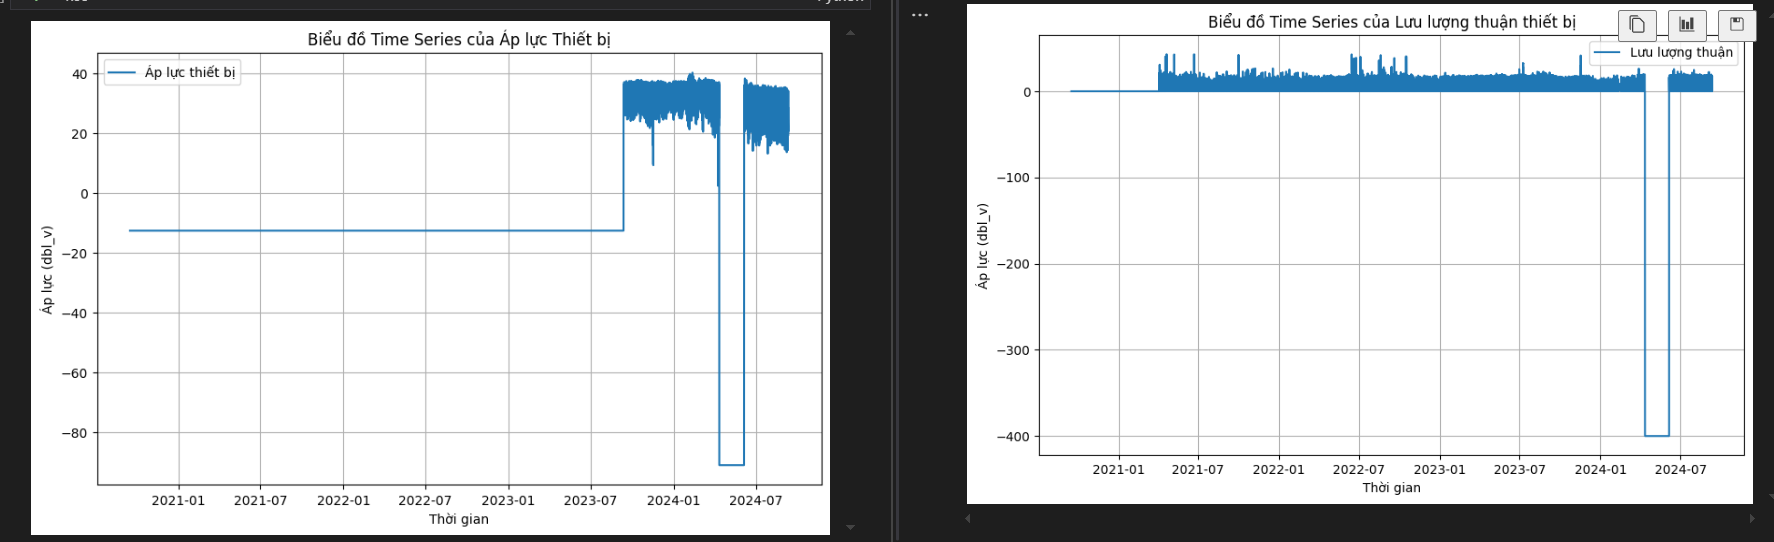
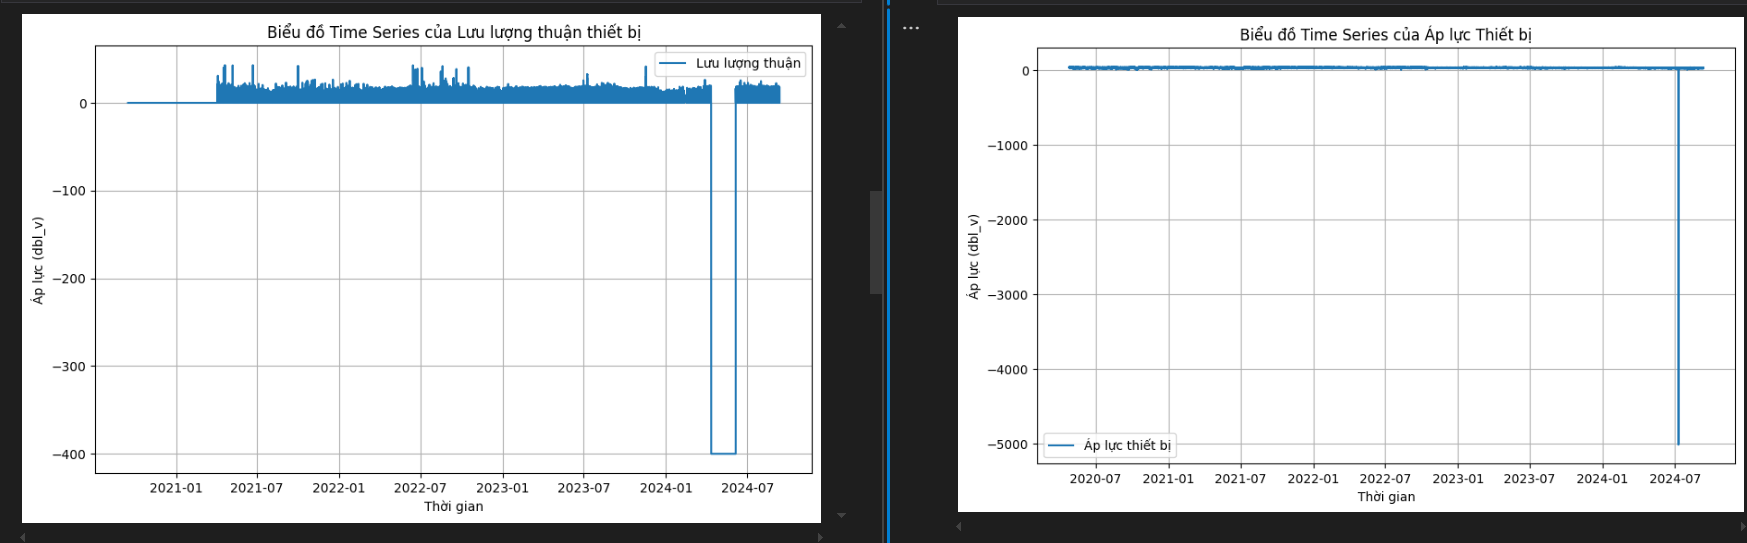

##### **Kết luận: Phân tích theo thời gian tính bằng năm thì khó**

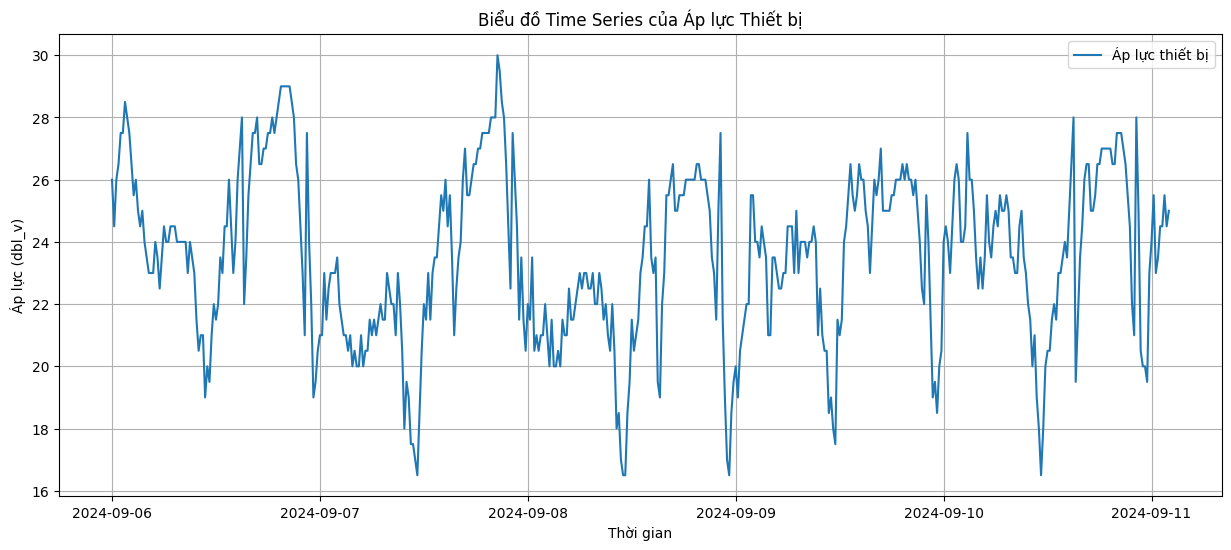

In [166]:
df_pre = df[df['parameter_key']=='Áp lực']
start_date = '2024-09-6'
end_date = '2024-09-20'
df_deviceid = df_pre[(df_pre['deviceid'] == '66f113dabfa5a22a633dc0d4') & 
                     (df_pre['time'] >= start_date) & 
                     (df_pre['time'] <= end_date)]

df_deviceid = df_deviceid.sort_values(by='time')
plt.figure(figsize=(15, 6))
plt.plot(df_deviceid['time'], df_deviceid['dbl_v'], label='Áp lực thiết bị')
plt.xlabel('Thời gian')
plt.ylabel('Áp lực (dbl_v)')
plt.title('Biểu đồ Time Series của Áp lực Thiết bị')
plt.legend()
plt.grid(True)
plt.show()

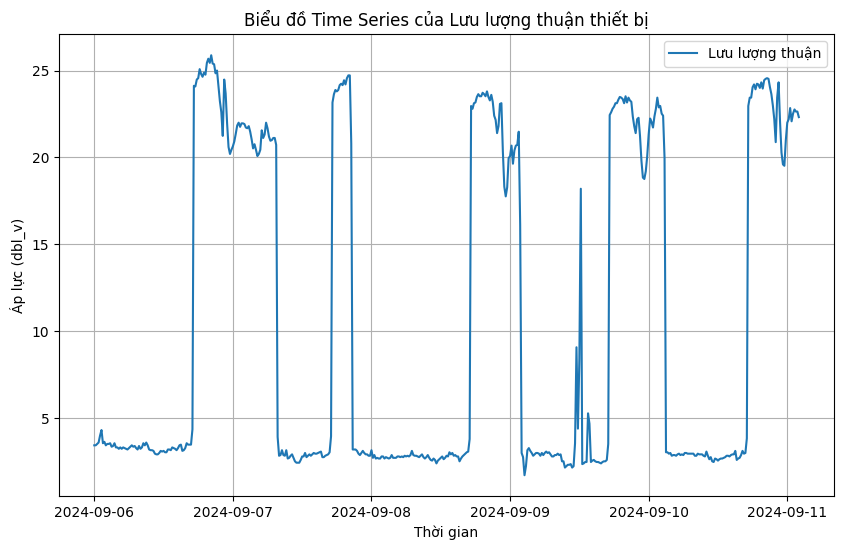

In [165]:
df_pre = df[df['parameter_key']=='Lưu lượng thuận']
start_date = '2024-09-06'
end_date = '2024-09-20'
df_deviceid = df_pre[(df_pre['deviceid'] == '66f113dabfa5a22a633dc0d4') & 
                     (df_pre['time'] >= start_date) & 
                     (df_pre['time'] <= end_date)]

df_deviceid = df_deviceid.sort_values(by='time')
plt.figure(figsize=(10, 6))
plt.plot(df_deviceid['time'], df_deviceid['dbl_v'], label='Lưu lượng thuận')
plt.xlabel('Thời gian')
plt.ylabel('Áp lực (dbl_v)')
plt.title('Biểu đồ Time Series của Lưu lượng thuận thiết bị')
plt.legend()
plt.grid(True)
plt.show()

Khi thực hiện phân tích chi tiết ra theo mức độ ngày:
- Xu hướng chu kỳ đã xuất hiện và có sự thay đổi rõ ràng giữa thời điểm cuối ngày  và thời điểm giữa ngày. Và lặp lại một chu kỳ (hình) hơi tương đồng với ngày hôm sau 
- Khi ta xem xét cùng một thiết bị giữa yếu tố áp lực và lưu lượng thì nhìn bằng mắt thường đối với biểu đồ time series thì có thể thấy chúng không có sư liên quan gì đến 


##### **Kết luận: Có tính chu kỳ theo ngày**

<Figure size 1200x600 with 0 Axes>

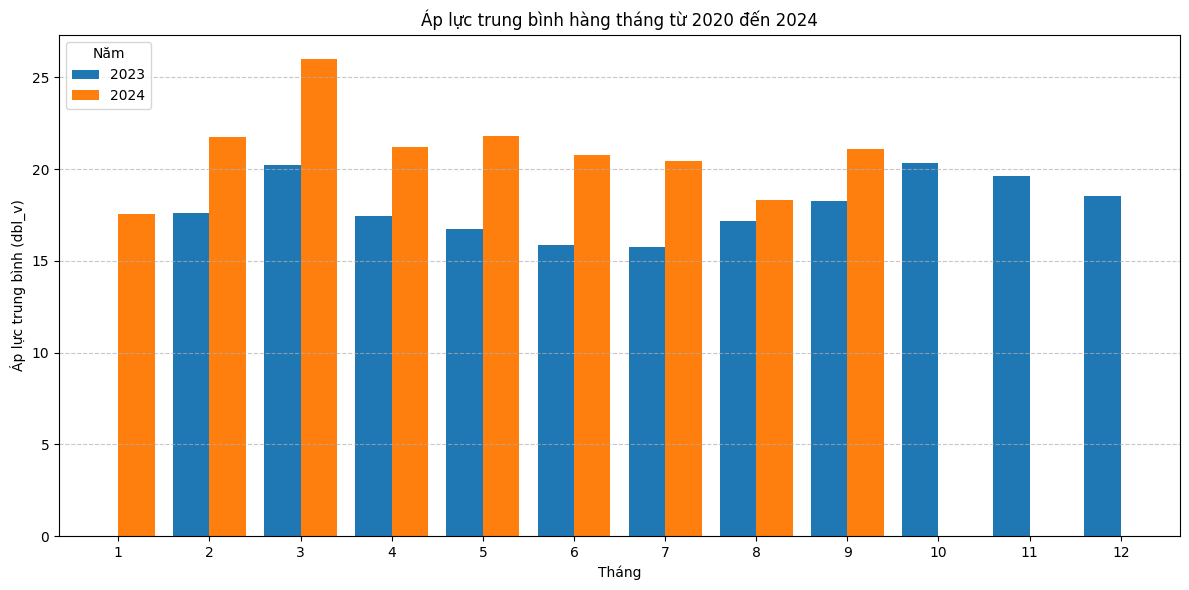

In [191]:
import warnings 
warnings.filterwarnings('ignore')

df_filtered = df_pre[(df_pre['deviceid'] == '66f113dbbfa5a22a633dc0f2') & 
                     (df_pre['time'].dt.year >= 2020) & 
                     (df_pre['time'].dt.year <= 2024)]

df_filtered['year'] = df_filtered['time'].dt.year
df_filtered['month'] = df_filtered['time'].dt.month

monthly_avg_by_year = df_filtered.groupby(['year', 'month'])['dbl_v'].mean().unstack(level=0)
plt.figure(figsize=(12, 6))
monthly_avg_by_year.plot(kind='bar', figsize=(12, 6), width=0.8)

plt.xlabel('Tháng')
plt.ylabel('Áp lực trung bình (dbl_v)')
plt.title('Áp lực trung bình hàng tháng từ 2020 đến 2024')
plt.legend(title='Năm', loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
import warnings 
warnings.filterwarnings('ignore')

df_filtered = df_pre[(df_pre['deviceid'] == '66f113dabfa5a22a633dc0da') & 
                     (df_pre['time'].dt.year >= 2020) & 
                     (df_pre['time'].dt.year <= 2024)]

df_filtered['year'] = df_filtered['time'].dt.year
df_filtered['month'] = df_filtered['time'].dt.month

monthly_avg_by_year = df_filtered.groupby(['year', 'month'])['dbl_v'].mean().unstack(level=0)
plt.figure(figsize=(12, 6))
monthly_avg_by_year.plot(kind='bar', figsize=(12, 6), width=0.8)

plt.xlabel('Tháng')
plt.ylabel('Áp lực trung bình (dbl_v)')
plt.title('Áp lực trung bình hàng tháng từ 2020 đến 2024')
plt.legend(title='Năm', loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
